In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
gm = pd.read_csv('gapminder.csv', na_values=' ', index_col=0)
gm

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
country,,,,,,,,,,,,,,,
Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.600000,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04
Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,0.1,12.500073,73.131,0.420095,2.0,590.509814,4.848770,50.500000,65.22
Andorra,21943.339898,10.17,NaN,NaN,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,5.362179,NaN,88.92
Angola,1381.004268,5.57,1.461329,23.1,2.483580e+08,69.400002,2.0,9.999954,51.093,NaN,-2.0,172.999227,14.554677,75.699997,56.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,722.807559,3.91,1.085367,16.2,1.425435e+09,67.599998,0.4,27.851822,75.181,NaN,-7.0,302.725655,11.653322,71.000000,27.84
West Bank and Gaza,NaN,NaN,5.936085,NaN,1.424133e+07,11.300000,NaN,36.422772,72.832,NaN,NaN,NaN,NaN,32.000000,71.90
"Yemen, Rep.",610.357367,0.20,2.316235,35.1,2.348647e+08,20.299999,NaN,12.349750,65.493,NaN,-2.0,130.057831,6.265789,39.000000,30.64


In [4]:
for i in gm:
    if i != 'polityscore':
        gm[i] -= gm[i].mean()
gm['polityscore'] = (gm['polityscore'] >= 6).astype(int)
gm

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
country,,,,,,,,,,,,,,,
Afghanistan,NaN,-6.659412,-0.874363,-10.60289,-4.957318e+09,-21.949438,NaN,-31.978594,-21.080524,NaN,0,NaN,-2.956454,-2.935954,-32.72936
Albania,-6825.969525,0.600588,-0.419280,19.99711,-4.809514e+09,-5.449440,NaN,9.357231,7.164476,NaN,1,-536.837612,-1.941509,-7.235954,-10.04936
Algeria,-6508.972741,-5.999412,0.862801,-13.90289,-2.101153e+09,-15.849437,-1.835442,-23.132642,3.377476,-1.063991,0,-582.669181,-4.792069,-8.135955,8.45064
Andorra,13202.373821,3.480588,NaN,NaN,NaN,NaN,NaN,45.367284,NaN,NaN,0,NaN,-4.278660,NaN,32.15064
Angola,-7359.961809,-1.119412,0.017313,-14.30289,-4.784904e+09,21.850563,0.064558,-25.632762,-18.660524,NaN,0,-1000.179767,4.913838,17.064042,-0.06936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,-8018.158517,-2.779412,-0.358649,-21.20289,-3.607827e+09,20.050560,-1.535442,-7.780894,5.427476,NaN,0,-870.453340,2.012483,12.364045,-28.92936
West Bank and Gaza,NaN,NaN,4.492069,NaN,-5.019020e+09,-36.249438,NaN,0.790056,3.078476,NaN,0,NaN,NaN,-26.635955,15.13064
"Yemen, Rep.",-8130.608709,-6.489412,0.872218,-2.30289,-4.798397e+09,-27.249439,NaN,-23.282965,-4.260524,NaN,0,-1043.121163,-3.375050,-19.635955,-26.12936


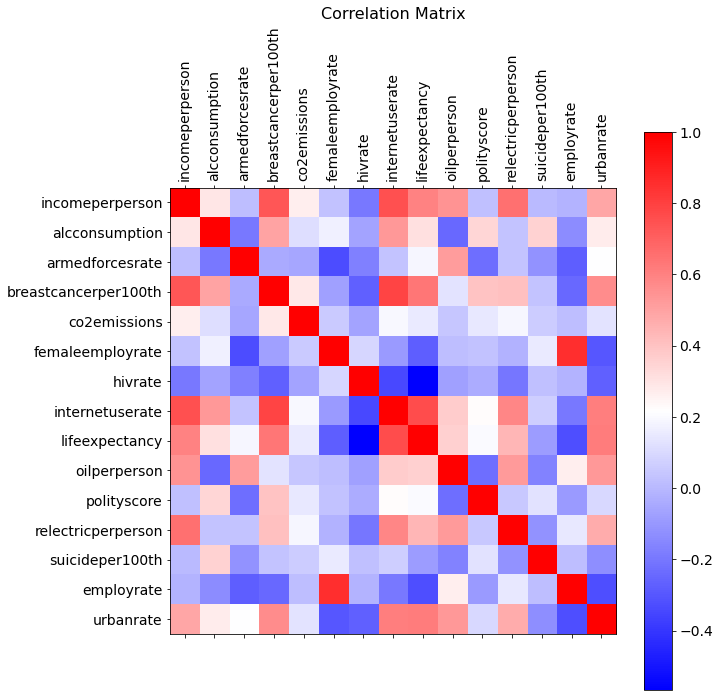

In [5]:
f = plt.figure(figsize=(10, 10))
plt.matshow(gm.corr(), fignum=f.number, cmap='bwr')
plt.xticks(range(gm.select_dtypes(['number']).shape[1]), gm.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(gm.select_dtypes(['number']).shape[1]), gm.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

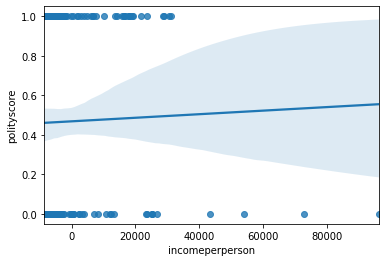

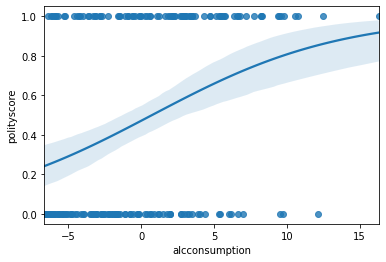

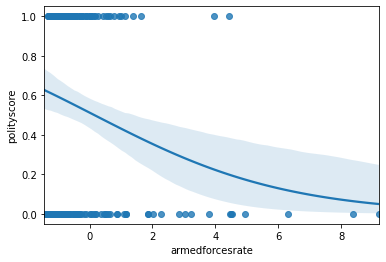

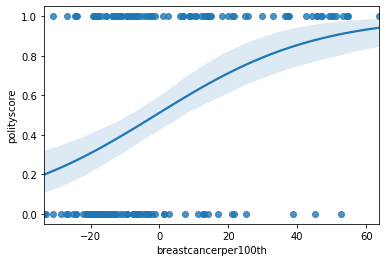

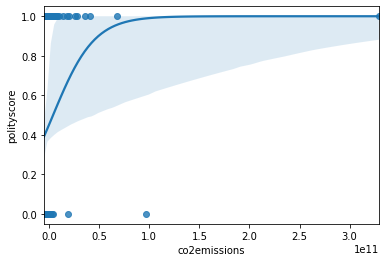

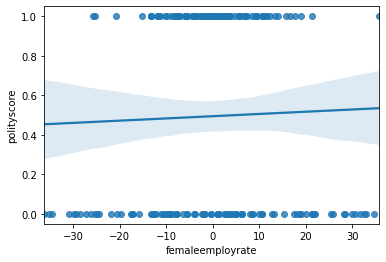

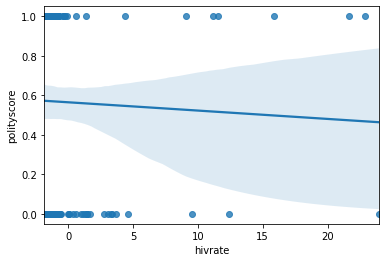

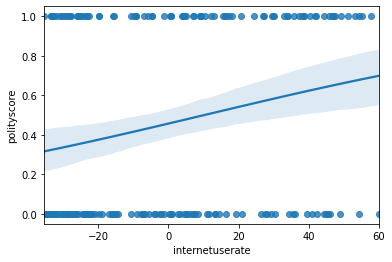

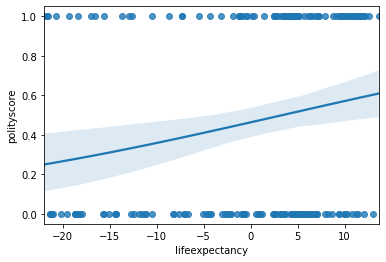

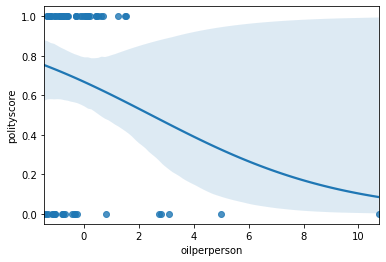

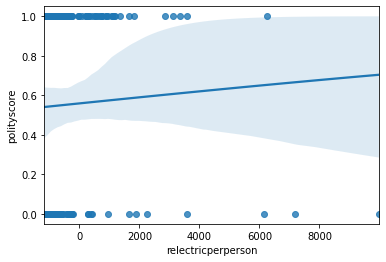

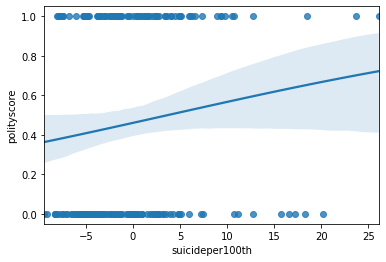

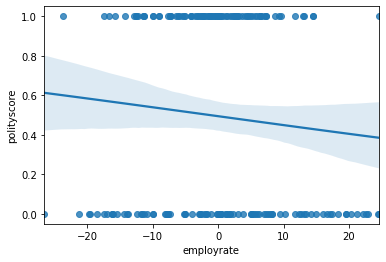

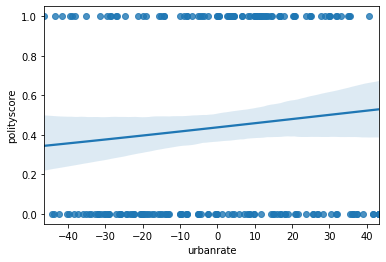

In [6]:
for i in gm:
    if i != 'polityscore':
        plt.figure()
        sns.regplot(x=i, y='polityscore', data=gm, logistic=True)

In [32]:
lreg = smf.logit(formula='polityscore ~ armedforcesrate + breastcancerper100th + alcconsumption', data=gm).fit()
print(lreg.summary())

Optimization terminated successfully.
         Current function value: 0.556361
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            polityscore   No. Observations:                  161
Model:                          Logit   Df Residuals:                      157
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Apr 2021   Pseudo R-squ.:                  0.1962
Time:                        15:50:53   Log-Likelihood:                -89.574
converged:                       True   LL-Null:                       -111.44
Covariance Type:            nonrobust   LLR p-value:                 1.713e-09
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1204      0.188      0.640      0.522      -0.248       0.489

In [34]:
# odd ratios with 95% confidence intervals
params = lreg.params
conf = lreg.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

                      Lower CI  Upper CI        OR
Intercept             0.780137  1.630757  1.127924
armedforcesrate       0.549050  0.981912  0.734247
breastcancerper100th  1.016301  1.061356  1.038584
alcconsumption        1.008393  1.191259  1.096019
